# **4. PyTorch Custom Datasets**

# **0. Importing PyTorch and setting up device-agnostic code**

## Domain libraries

## Depending on what you are working on: vision, text, audio, recommendation, you will want to look into each of the PyTorch domain libraries for existing data loading functions and customizable data loading functions

In [8]:
import torch
from torch import nn

In [9]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## **1. Get Data**

## Our dataset is a subset of the Food101 dataset. - https://pytorch.org/vision/main/generated/torchvision.datasets.Food101.html

## Food101 starts with 101 different classes of food and 1000 images per class (750 - training, 250 - testing)

## Our dataset starts with 3 classes of food and only 10% of the images (75 - training, 25 - testing)

## Why do this?

## When starting out ML projects, it's important to try things on a small scale and then increase the scale when necessary.

## The whole point is to speed up how fast you can experiment.

In [10]:
import requests
import zipfile
from pathlib import Path

# Setup path to a dataloader
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory already exists... skipping download")
else:
  print(f"{image_path} doesn't exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and sushi data.
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak and sushi data...")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi doesn't exist, creating one...
Unzipping pizza, steak and sushi data...


## **2. Becoming one with the data (data preparation and data exploration)**

If Albert Einstein were to explain this part of the code in simple words, he might say:

---

"This piece of code is designed to explore a directory (folder) on your computer and list out how many subdirectories (subfolders) and files (images) it contains. Here's a step-by-step explanation:

1. **Importing the OS Module**:
   - The `os` module provides a way to interact with the operating system, including accessing the file system.

   ```python
   import os
   ```

2. **Defining a Function**:
   - We define a function called `walk_through_dir` that takes one input, `dir_path`, which is the path to the directory you want to explore.

   ```python
   def walk_through_dir(dir_path):
       """Walks through dir_path returning its contents."""
   ```

3. **Walking Through the Directory**:
   - The function uses `os.walk(dir_path)` to go through the directory and its subdirectories.
   - `os.walk` generates the file names in a directory tree by walking either top-down or bottom-up.

   ```python
   for dirpath, dirnames, filenames in os.walk(dir_path):
   ```

   - `dirpath`: The current path being explored.
   - `dirnames`: A list of subdirectory names in the current `dirpath`.
   - `filenames`: A list of file names in the current `dirpath`.

4. **Printing the Results**:
   - For each directory it explores, the function prints out how many subdirectories and files (images) it contains.

   ```python
   print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' ")
   ```

Here’s the complete code:

```python
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' ")
```

In summary:
1. **Purpose**: The function explores a given directory and its subdirectories.
2. **Walking Through**: It uses `os.walk` to visit every directory and file in the given path.
3. **Printing Information**: It prints out the number of subdirectories and files (images) found in each directory it visits.

This code is useful for understanding the structure and contents of a directory, especially when dealing with a large collection of images or files."

---

This explanation provides a clear, step-by-step breakdown of what the code does and its purpose, making it easy to understand.

In [11]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' ")

In [12]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi' 
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train' 
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza' 
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak' 
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi' 
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test' 
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza' 
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak' 
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi' 


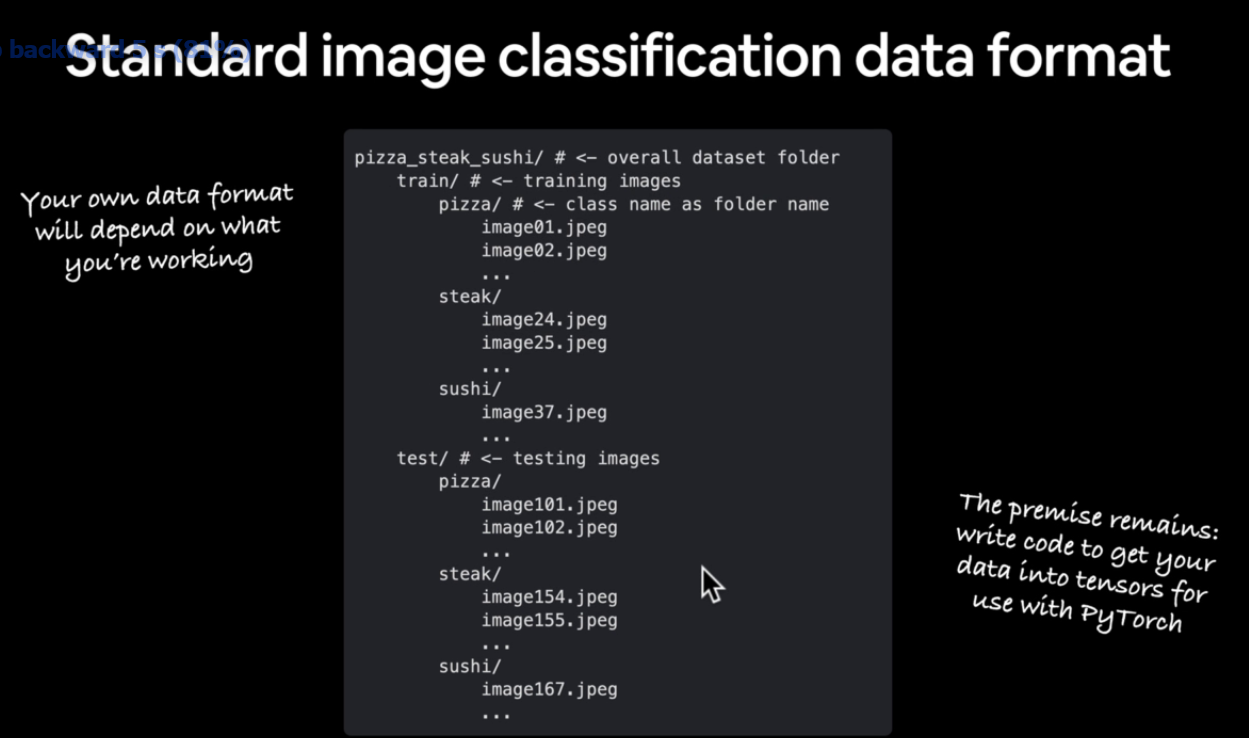

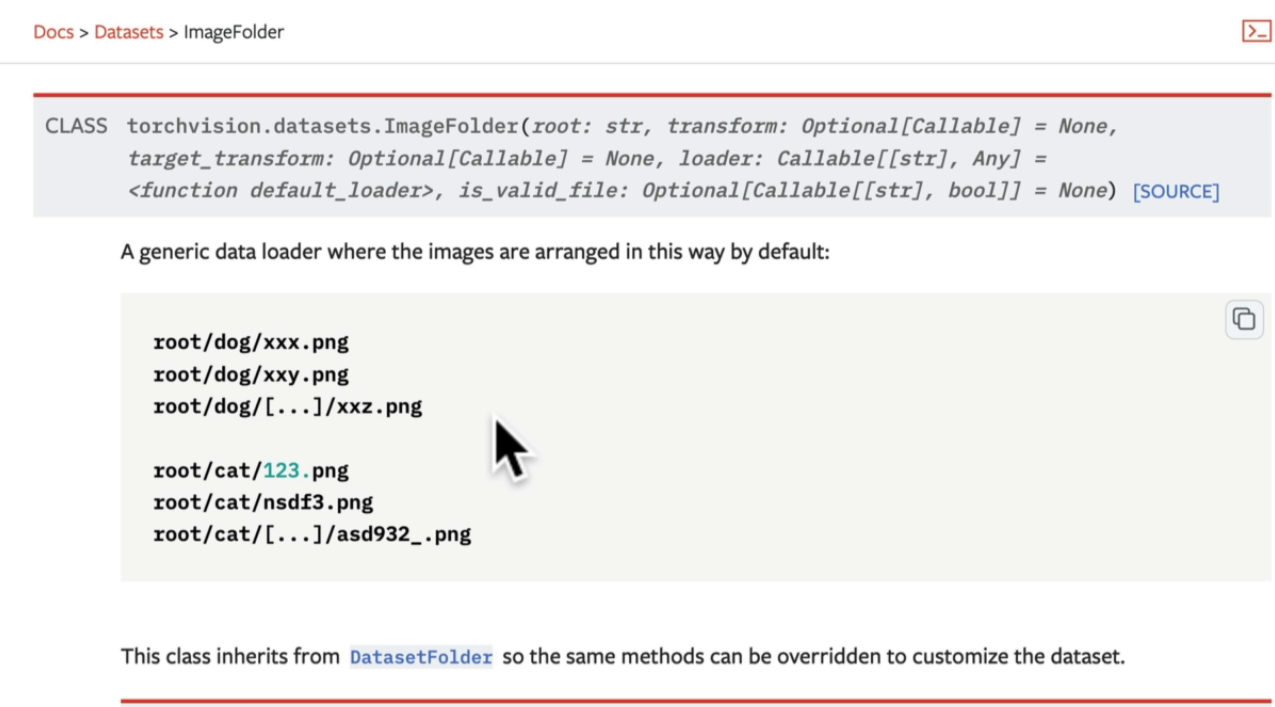

If Albert Einstein were to explain this part of the code in simple words, he might say:

---

"This piece of code is setting up paths to two different sets of images: one for training a model and one for testing the model. Let me explain step by step:

1. **Base Image Path**:
   - You have a base path where all your images are stored. This is represented by `image_path`.

2. **Training and Testing Directories**:
   - You want to organize your images into two groups:
     - `train_dir` for training images.
     - `test_dir` for testing images.
   
   - You create paths to these directories by appending `/train` and `/test` to the base path.

   ```python
   train_dir = image_path / "train"
   test_dir = image_path / "test"
   ```

3. **Output the Paths**:
   - The last line simply displays the paths for both the training and testing directories. This helps confirm that the paths have been set up correctly.

   ```python
   train_dir, test_dir
   ```

Here’s the complete code:

```python
# Setup training and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir
```

In summary:
1. **Organizing Images**: You are organizing your images into two groups: one for training and one for testing.
2. **Creating Paths**: You create the paths to these groups by specifying the subdirectories `train` and `test` within your base image directory.
3. **Displaying Paths**: You display these paths to ensure they are correctly set up.

This helps in preparing your data for training a model (using the training images) and then testing how well the model performs (using the testing images)."

---

This explanation breaks down the code's purpose and each step, making it clear and easy to understand for someone not familiar with programming concepts.

In [13]:
# Setup training and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### **2.1 Visualizing an image**

## Let's write some code to:

## 1. Get all of the image paths
## 2. Pick a random image path using Python's random.choice()
## 3. Get the image class name using `pathlib.Path.parents.stem`
## 4. Since we're working with images, let's open the image with Python's PIL
## 5. We'll then show the image and print metadata.

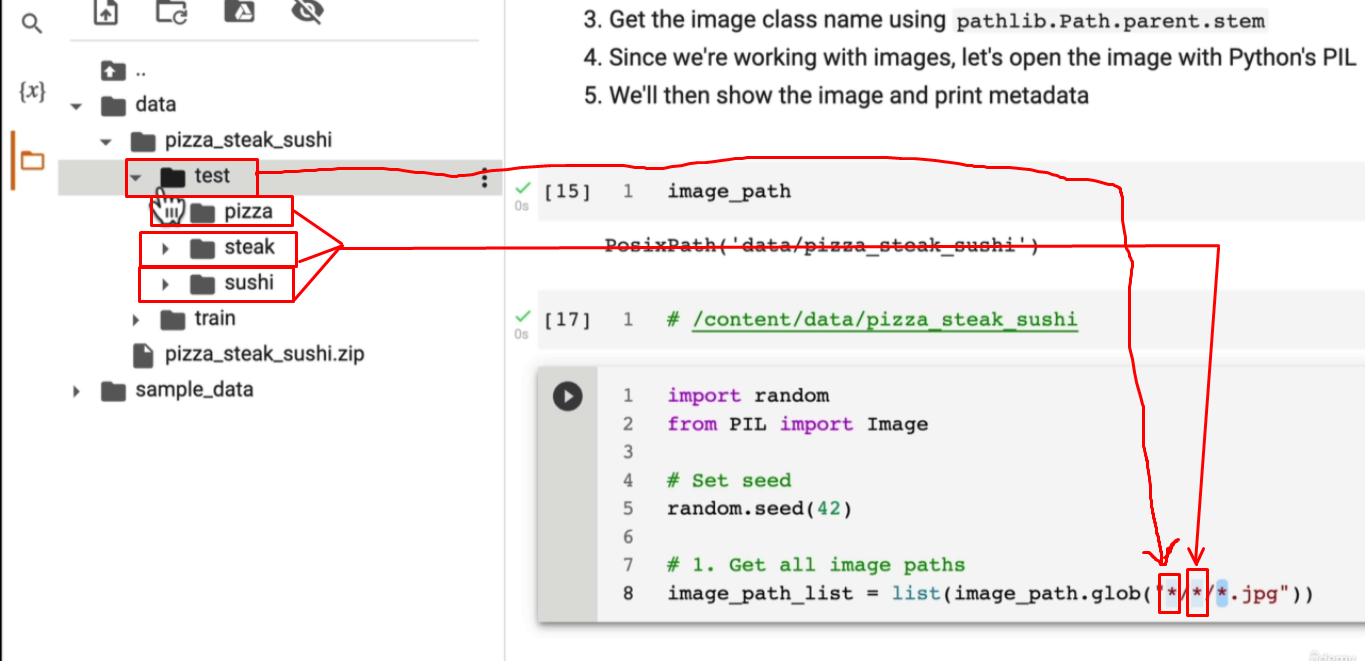

If Albert Einstein were to explain this part of the code in simple words, he might say:

---

"This piece of code is about picking a random image from a collection, displaying some information about it, and opening it. Let's break it down:

1. **Importing Libraries**:
   - We bring in two tools:
     - `random`, which helps us pick random items.
     - `PIL.Image`, which helps us open and work with images.

   ```python
   import random
   from PIL import Image
   ```

2. **Setting a Seed** (Optional):
   - Setting a seed ensures the randomness is the same each time we run the code. This part is commented out, but if you uncomment it, it makes the random choice predictable for debugging or testing.

   ```python
   # random.seed(42)
   ```

3. **Getting All Image Paths**:
   - We gather all the paths to our images. The images are expected to be in a nested folder structure.

   ```python
   image_path_list = list(image_path.glob("*/*/*.jpg"))
   ```

4. **Picking a Random Image Path**:
   - We randomly pick one image from our list of image paths.

   ```python
   random_image_path = random.choice(image_path_list)
   ```

5. **Getting the Image Class**:
   - The class of the image is taken from the name of the folder where the image is stored.

   ```python
   image_class = random_image_path.parent.stem
   ```

6. **Opening the Image**:
   - We open the selected image using `PIL`.

   ```python
   img = Image.open(random_image_path)
   ```

7. **Printing Metadata**:
   - We print some information about the selected image: its path, class, height, and width.

   ```python
   print(f"Random image path: {random_image_path}")
   print(f"Image class: {image_class}")
   print(f"Image height: {img.height}")
   print(f"Image width: {img.width}")
   ```

8. **Displaying the Image**:
   - Simply typing `img` in a Jupyter notebook cell will display the image.

   ```python
   img
   ```

Here’s the complete code together:

```python
import random
from PIL import Image

# Set seed
# random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")

img
```

In summary:
1. We collect paths to all images.
2. We randomly pick one image.
3. We determine the image's class from its folder name.
4. We open the image.
5. We print some details about the image.
6. We display the image.

This code is helpful for randomly selecting an image from a dataset and viewing its properties and content."

---

This explanation provides a step-by-step breakdown of the code, making each part's function clear and understandable.

Random image path: data/pizza_steak_sushi/test/sushi/1742201.jpg
Image class: sushi
Image height: 512
Image widht: 512


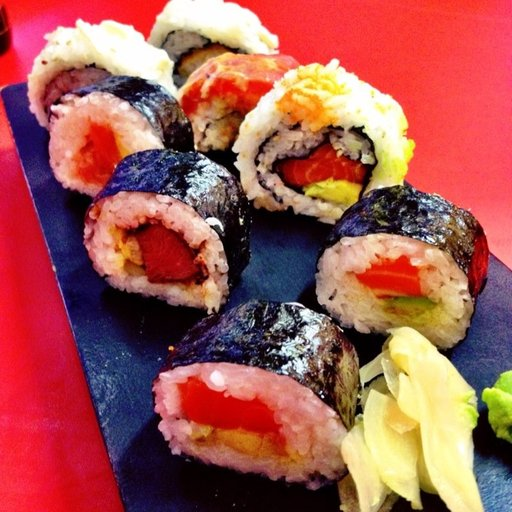

In [14]:
import random
from PIL import Image

# Set seed
# random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image widht: {img.width}")

img

If Albert Einstein were to explain this part of the code in simple words, he might say:

---

"This code snippet is about displaying an image using a computer program. Here's what it does step by step:

1. **Import Libraries**:
   - First, we bring in two important tools:
     - `numpy` (imported as `np`), which helps us work with arrays (a way to store data).
     - `matplotlib.pyplot` (imported as `plt`), which helps us make plots and graphs.

   ```python
   import numpy as np
   import matplotlib.pyplot as plt
   ```

2. **Convert the Image to an Array**:
   - We take an image (`img`) and turn it into an array (a grid of numbers) using `numpy`. This array represents the image in a way the computer can understand.
   
   ```python
   img_as_array = np.asarray(img)
   ```

3. **Plot the Image**:
   - We set up the size of the plot (the space where the image will be displayed).

   ```python
   plt.figure(figsize=(10, 7))
   ```

   - We display the image using `imshow` from `matplotlib`.

   ```python
   plt.imshow(img_as_array)
   ```

   - We add a title to the plot that shows the image's class and its shape (dimensions: height, width, and color channels).

   ```python
   plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
   ```

   - We turn off the axis lines and labels to make the plot look cleaner.

   ```python
   plt.axis(False)
   ```

Here's the complete code:

```python
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with Matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)
```

In summary:
1. We import tools for working with arrays and plotting.
2. We convert the image to a grid of numbers.
3. We set up a plot, display the image, add a title with information about the image, and remove the axis for a cleaner look.

This code helps you see the image and understand its properties, like its size and class."

---

This explanation keeps the concepts simple, focusing on the main steps and their purpose, using easy-to-understand language and analogies.

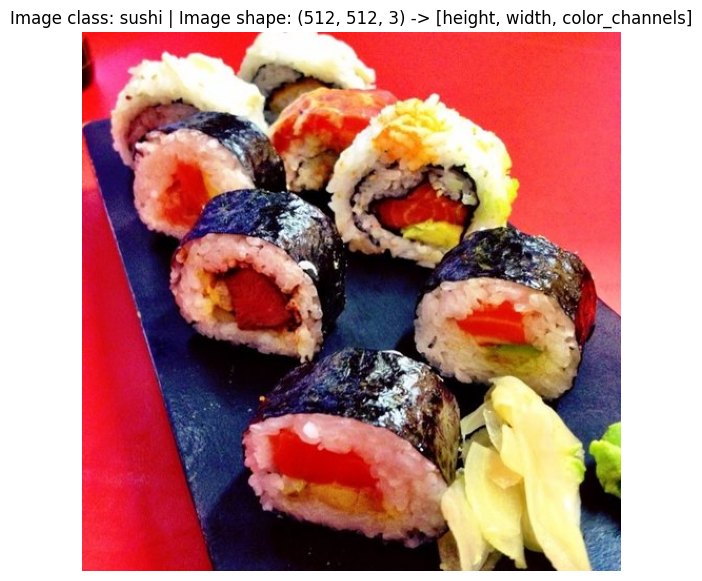

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with Matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

array([[[252,  19,  15],
        [250,  21,  16],
        [249,  26,  19],
        ...,
        [251,  56,  96],
        [249,  54,  98],
        [255,  61, 105]],

       [[251,  22,  19],
        [250,  22,  19],
        [245,  26,  20],
        ...,
        [252,  57,  97],
        [249,  54,  96],
        [255,  61, 105]],

       [[246,  22,  20],
        [243,  24,  20],
        [239,  24,  19],
        ...,
        [253,  58,  98],
        [249,  54,  96],
        [255,  61, 103]],

       ...,

       [[253,  47,  70],
        [255,  51,  74],
        [255,  49,  72],
        ...,
        [110, 151, 183],
        [108, 149, 179],
        [ 91, 132, 160]],

       [[245,  39,  62],
        [244,  38,  61],
        [248,  42,  65],
        ...,
        [103, 144, 176],
        [100, 141, 169],
        [113, 157, 182]],

       [[248,  42,  65],
        [243,  37,  60],
        [251,  45,  68],
        ...,
        [126, 167, 197],
        [ 99, 143, 170],
        [114, 158, 183]]], dtype=uint8)
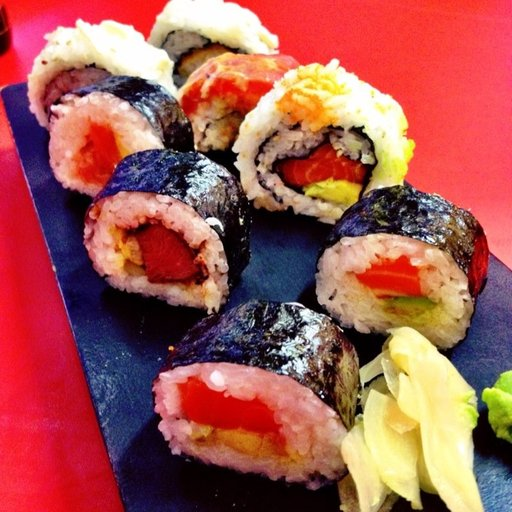

In [16]:
img_as_array

## **3. Transforming data**

## Before we can use our image data with PyTorch:

## 1. Turn your target data into tensors (in our case, numerical representation of our images)
## 2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader`, we'll call these `Dataset` and `Dataloader`.

In [17]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### **3.1 Transforming data with `torchvision.transforms`**

## Transforms help you get your images ready to be used with a model/perform data augmentation - https://pytorch.org/vision/stable/transforms.html

If Albert Einstein were to explain this part of the code, he might say:

---

"Here we are creating a special filter for our images, which consists of a series of steps. This filter is called `data_transform`. Let me break it down for you:

1. **Combining Steps**:
   - We use `transforms.Compose` to combine several transformations into one. Think of it as putting several instructions into a single recipe.

2. **Steps in the Recipe**:
   - **Resize the Images**:
     ```python
     transforms.Resize(size=(64, 64))
     ```
     This step resizes each image to be 64x64 pixels. It's like making sure all photos are the same size.

   - **Flip the Images Randomly**:
     ```python
     transforms.RandomHorizontalFlip(p=0.5)
     ```
     This step randomly flips the image horizontally (like a mirror image) with a 50% chance. It's like sometimes looking at the photo in a mirror and sometimes not.

   - **Convert to Tensor**:
     ```python
     transforms.ToTensor()
     ```
     This step converts the image into a format (called a tensor) that the computer can easily work with. Think of it as changing the photo into a special data format for calculations.

Here's the full code for this filter:

```python
data_transform = transforms.Compose([
    # 1. Resize our images to 64x64
    transforms.Resize(size=(64, 64)),

    # 2. Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),

    # 3. Turn the image into a torch.Tensor
    transforms.ToTensor()
])
```

In simple terms, this filter:
1. Makes all images 64x64 pixels.
2. Sometimes flips the images horizontally.
3. Converts the images into a format that's ready for machine learning.

So, this filter helps prepare your images for further processing or analysis by ensuring they are uniform in size, sometimes mirrored for variety, and in the right format for computations."

---

This explanation uses an analogy to a recipe to simplify the concept of combining multiple transformations and explains each step in an easy-to-understand manner.

In [18]:
# Write a transform for image
data_transform = transforms.Compose([ # transforms.Compose "It takes a list" = to combine transforms together or nn.Sequential()
    # 1. Resize our images to 64x64
    transforms.Resize(size=(64, 64)),

    # 2. Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),

    # 3. Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [19]:
data_transform(img)

tensor([[[0.9843, 0.9843, 0.9843,  ..., 0.9882, 0.9804, 0.8902],
         [0.9804, 0.9843, 0.9882,  ..., 0.9882, 0.9529, 0.6706],
         [0.9843, 0.9843, 0.9882,  ..., 0.9804, 0.9176, 0.5137],
         ...,
         [0.4157, 0.3804, 0.3294,  ..., 0.9804, 0.9804, 0.9804],
         [0.4039, 0.3686, 0.3490,  ..., 0.9804, 0.9804, 0.9804],
         [0.4157, 0.3490, 0.3216,  ..., 0.9843, 0.9804, 0.9843]],

        [[0.2275, 0.2314, 0.2275,  ..., 0.0980, 0.0863, 0.0745],
         [0.2392, 0.2471, 0.2431,  ..., 0.1294, 0.1137, 0.0431],
         [0.2745, 0.2706, 0.2745,  ..., 0.1725, 0.1294, 0.0353],
         ...,
         [0.5608, 0.5451, 0.4980,  ..., 0.1608, 0.1765, 0.1725],
         [0.5451, 0.5255, 0.5294,  ..., 0.1412, 0.1647, 0.1725],
         [0.5569, 0.5059, 0.4941,  ..., 0.1412, 0.1686, 0.1804]],

        [[0.3608, 0.3176, 0.2627,  ..., 0.1059, 0.1020, 0.0745],
         [0.3686, 0.3412, 0.3059,  ..., 0.1608, 0.1294, 0.0510],
         [0.3922, 0.3647, 0.3373,  ..., 0.2824, 0.1804, 0.

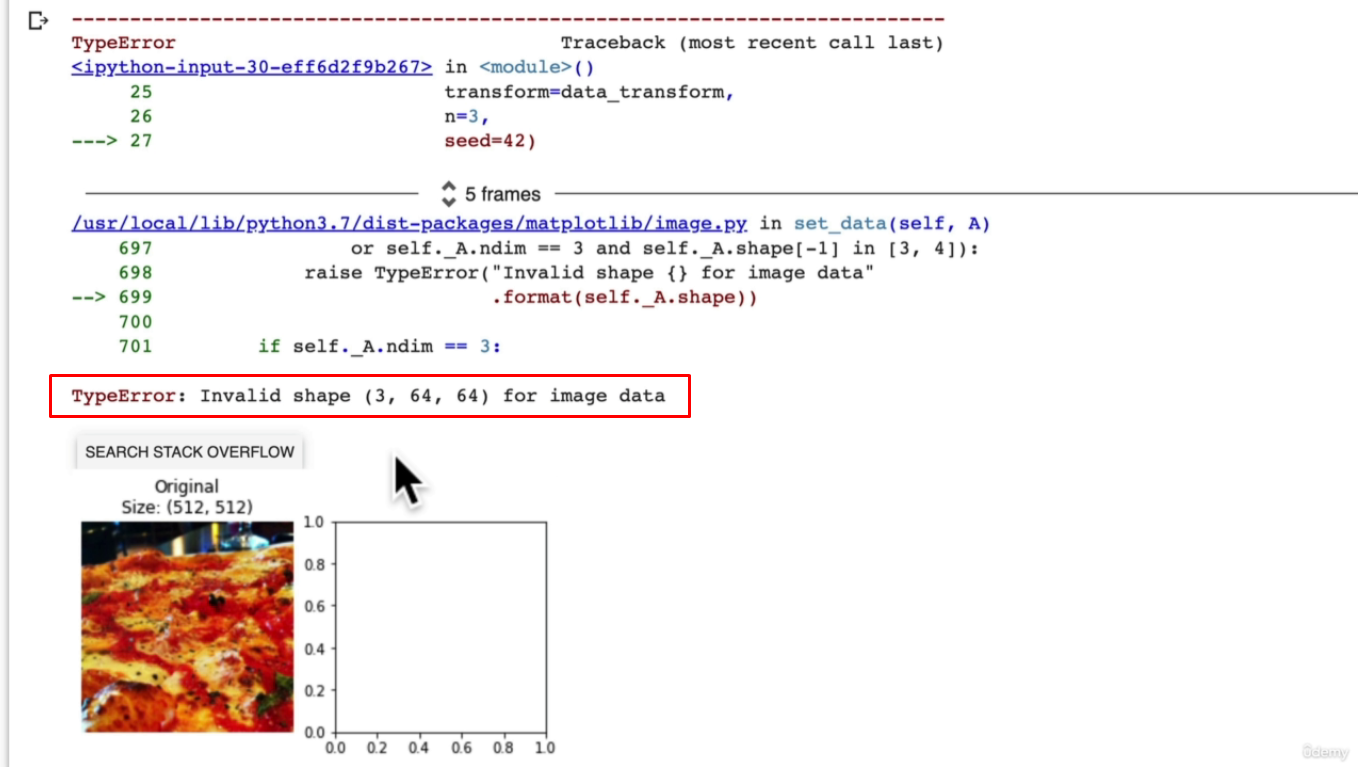

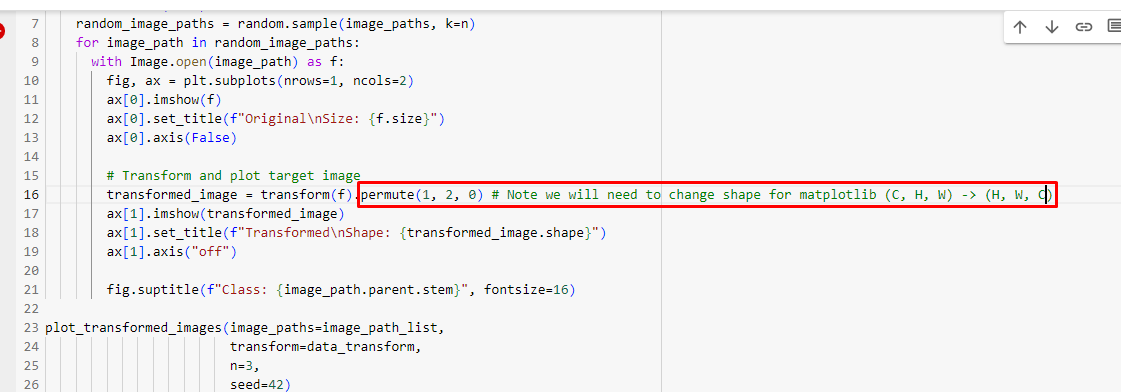

If Albert Einstein were to explain this code in simple words, he might say:

---

"Imagine you have a collection of photographs and you want to see how they look after applying a special filter. This code does that for you. Here’s how it works:

1. **Purpose**:
   - The function `plot_transformed_images` helps you pick a few photos randomly from your collection, apply a filter to each one, and then show you the original and the filtered versions side by side.

2. **Ingredients**:
   - `image_paths`: A list of where your photos are stored.
   - `transform`: The special filter you want to apply to your photos.
   - `n`: The number of photos you want to pick and transform (default is 3).
   - `seed`: A number to make sure you get the same random photos every time if you want.

3. **Steps**:
   - **Setting the Seed**: If you provide a seed, the randomness will always be the same.
   - **Picking Photos**: Randomly choose `n` photos from your list.
   - **Showing Photos**: For each chosen photo:
     - Open the photo.
     - Show the original photo.
     - Apply the filter (transform) to the photo.
     - Adjust the photo's dimensions for proper display.
     - Show the transformed photo.
     - Label the class of the photo based on its folder name.

Here’s the detailed breakdown:

1. **Setting the Seed**:
   ```python
   if seed:
       random.seed(seed)
   ```
   This ensures that if you provide a seed number, the same photos are chosen every time.

2. **Selecting Random Photos**:
   ```python
   random_image_paths = random.sample(image_paths, k=n)
   ```
   This picks `n` random photos from your list.

3. **Opening and Displaying Photos**:
   ```python
   for image_path in random_image_paths:
       with Image.open(image_path) as f:
           fig, ax = plt.subplots(nrows=1, ncols=2)
           ax[0].imshow(f)
           ax[0].set_title(f"Original\nSize: {f.size}")
           ax[0].axis('off')
           
           # Transform and plot the target image
           transformed_image = transform(f).permute(1, 2, 0)  # Rearrange dimensions
           ax[1].imshow(transformed_image)
           ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
           ax[1].axis('off')
           
           fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
   ```
   - Open each photo and create a plot with two columns.
   - Display the original photo on the left.
   - Apply the filter to the photo and display the transformed version on the right.
   - Add titles and labels to help you understand what you're looking at.

4. **Example Usage**:
   ```python
   plot_transformed_images(image_paths=image_path_list, transform=data_transform, n=3, seed=42)
   ```
   This is how you call the function with your list of image paths, the filter, the number of photos to pick, and an optional seed.

In summary, this code helps you visualize the effect of a filter on a few random photos from your collection."

---

This explanation distills the essence of the function into simple, understandable terms, focusing on the purpose and main steps.

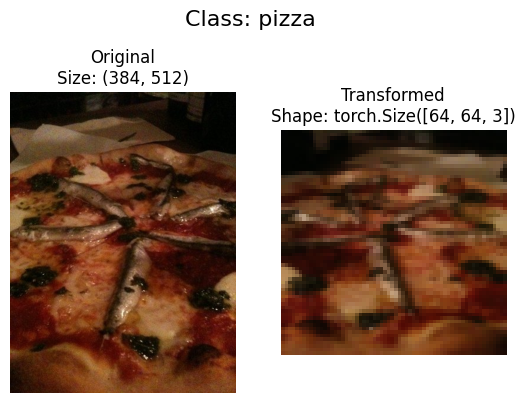

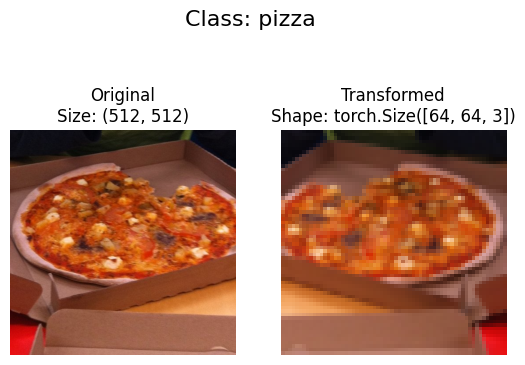

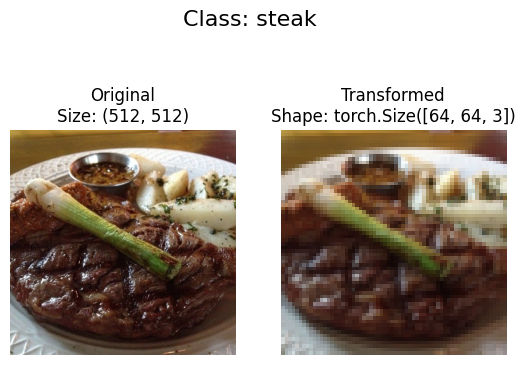

In [20]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
  """
  Selects random images from a path of images and loads/transforms them then plots the original vs the transformed version
  """
  if seed:
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
      with Image.open(image_path) as f:
        fig, ax = plt.subplots(nrows=1, ncols=2)
        ax[0].imshow(f)
        ax[0].set_title(f"Original\nSize: {f.size}")
        ax[0].axis(False)

        # Transform and plot target image
        transformed_image = transform(f).permute(1, 2, 0) # Note we will need to change shape for matplotlib (C, H, W) -> (H, W, C)
        ax[1].imshow(transformed_image)
        ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
        ax[1].axis("off")

        fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

## We resized using transformed function from 512x512 to 64x64. Why are we doing this?
## 1. Does this image still look like that? The most important thing will be if it looks like to our original model.
## 2. 64x64 is less information encoded in the image. So our model will be able to compute faster on the images of 64x64 size. However, we may lose some performance. Because not as much information is encoded as the original image.
## 3. You can change the size 64x64 to a hyperparameter to see if it improves your model

## **4. Option 1: Loading image data using `ImageFolder`**

## We can load image classification data using `torchvision.datasets.ImageFolder`
## https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html

In [21]:
# Use imageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # a transform for the data
                                  target_transform=None) # a transform for the label/target

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [22]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [23]:
# Get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [24]:
# Check the lengths of our dataset
len(train_data), len(test_data)

(225, 75)

In [25]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [26]:
# Index on the tran_data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image Tensor:\n {img}")
print(f"Image Shape: {img.shape}")
print(f"Image Datatype: {img.dtype}")
print(f"Image Label: {label}")
print(f"Label Datatype: {type(label)}")

Image Tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

In [27]:
label

0

## Now our target images are in the TENSOR FORMAT and LABEL is (0) NUMERIC FORMAT as well.

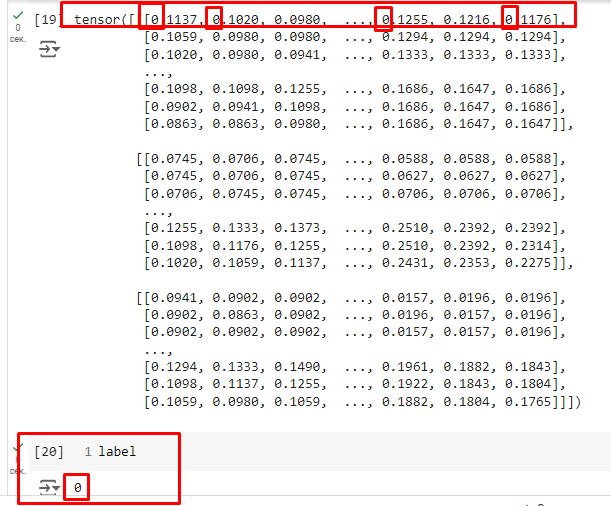

In [28]:
class_names[label] # A string format = non-numeric or with letters.

'pizza'

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

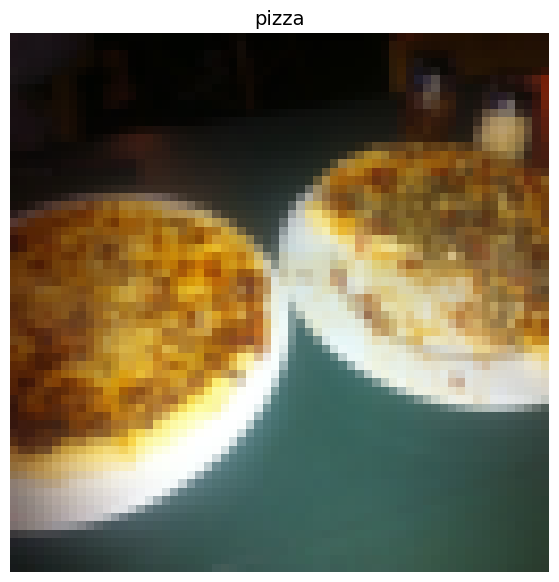

In [29]:
# Rearrange the order dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

## **4.1 Turn loaded images into `DataLoader`'s**

## A `DataLoader` is going to help us turn our `Dataset`'s into iterables and we can customise the `batch_size` so our model can see `batch_size` images at a time.

In [30]:
# Turn TRAIN and TEST DATASETS into DataLoader's
from torch.utils.data import DataLoader
BATCH_SIZE=1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e239b5ebe20>,
 <torch.utils.data.dataloader.DataLoader at 0x7e239b5ba7a0>)

In [31]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [32]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1 (we set 1 above), you can change the batch size if you like
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


## **5. Option 2: Loading Image Data with a Custom `Dataset`**

## 1. Want to be able to load images from file
## 2. Want to be able to get class names from the Dataset
## 3. Want to be able to get classes as dictionary from the Dataset

## Pros:
* ## Can create a `Dataset` out of almost anything
* ## Not limited to PyTorch pre-built `Dataset` functions

## Cons:
* ## Even though you could create `Dataset` out of almost everything, it doesn't mean it will WORK...
* ## Using a Custom `Dataset` often results in us writing more code, which could be prone to errors or performance.

In [33]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [34]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

## **5.1 Creating a helper function to get class names**

## We want a function:
1. ## Get the class names using `os.scandir()` to traverse a target directory (ideally the directory is in standard image classification format.)
2. ## Raise an error if the class names aren't found (if this happens, there might be something wrong with the directory structure)
3. ## Turn the class names into a dict and a list and return them.

If Albert Einstein were to explain this part of the code in simple words, he might say:

---

"This piece of code is setting up a target directory and then listing the class names found in that directory. Let’s go through it step by step:

1. **Setup Path for Target Directory**:
   - We assign `train_dir` (which we previously set up) to `target_directory`.
   - This sets the directory we want to explore.

   ```python
   target_directory = train_dir
   ```

   - We then print out the path of the target directory to confirm it.

   ```python
   print(f"Target dir: {target_directory}")
   ```

2. **Get Class Names from the Target Directory**:
   - We use `os.scandir` to scan through the `target_directory`.
   - For each entry found in the directory, we take its name.
   - We sort these names alphabetically to get an ordered list of class names.
   
   ```python
   class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
   ```

   - We display the sorted list of class names.

   ```python
   class_names_found
   ```

Here’s the complete code:

```python
# Setup path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found
```

In summary:
1. **Setting the Target Directory**: We set the target directory to the training directory and print its path.
2. **Listing Class Names**: We list and sort the names of subdirectories (class names) within the target directory.

This code is useful for identifying and organizing the different classes of images present in your training data. For example, in the output, it shows that the training data contains images of 'pizza', 'steak', and 'sushi'."

---

This explanation simplifies the purpose and functionality of the code, making it clear and easy to understand.

In [35]:
# Setup path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))]) # sorted([first.name for first in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

If Albert Einstein were to explain this part of the code in simple words, he might say:

---

"This piece of code is a function that helps find and organize the names of class folders in a given directory. Here’s how it works step by step:

1. **Function Definition**:
   - The function `find_classes` takes one input, `directory`, which is the path to the directory you want to explore.
   - It returns a tuple containing a list of class names and a dictionary that maps each class name to an index.

   ```python
   def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
       """Finds the class folder names in a target directory."""
   ```

2. **Get Class Names**:
   - It uses `os.scandir(directory)` to scan through the given directory and collects the names of all subdirectories (class folders).
   - The names are sorted alphabetically.

   ```python
   classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
   ```

3. **Raise an Error if No Classes Found**:
   - If no class names are found (i.e., the directory is empty or contains no subdirectories), the function raises a `FileNotFoundError`.

   ```python
   if not classes:
       raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check file structure.")
   ```

4. **Create a Dictionary of Index Labels**:
   - The function creates a dictionary where each class name is mapped to a unique index. This is useful because computers prefer numbers over strings for labels.

   ```python
   class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
   ```

5. **Return the Results**:
   - Finally, the function returns the list of class names and the dictionary mapping class names to indices.

   ```python
   return classes, class_to_idx
   ```

Here’s the complete code:

```python
from typing import List, Dict, Tuple
import os

def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory."""
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    # 2. Raise an error if class names could not be found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check file structure.")
    
    # 3. Create a dictionary of index labels (Computers prefer numbers rather than strings as labels)
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    
    return classes, class_to_idx
```

In summary:
1. **Purpose**: This function helps find and organize class names in a given directory.
2. **Class Names**: It scans the directory for subdirectories, collects their names, and sorts them.
3. **Error Handling**: If no classes are found, it raises an error.
4. **Index Mapping**: It creates a dictionary that maps each class name to a unique number.
5. **Return Values**: It returns the list of class names and the dictionary.

This function is useful for preparing data for machine learning tasks, where you need to organize and label different classes of data."

---

This explanation simplifies the purpose and functionality of the code, making it clear and easy to understand.

In [36]:
def find_classes(directory: str) -> Tuple[List [str], Dict[str, int]]:
  """Finds the class folder name in a target directory."""
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check file structure.")

  # 3. Create a dictionary of index labels (Computers prefer numbers rather than strings as labels)
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [37]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageFolder`

To create our own custom dataset, we want to:

1. Subclass `torch.utils.data.Dataset`
2. Init our subclass with a target directory (the directory we'd like to get data from) as well as a transform if we'd like to transform our data.
3. Create several attributes:
  * paths - paths of our images
  * transform - transform we'd like to use
  * classes - a list of the target classes
  * class_to_idx - a dict of the target classes mapped to integer labels
4. Create a function to `load_images()`, this function will open an image
5. Overwrite the `__len__` method to return the length of our dataset
6. Overwrite the `__getitem__` method to return a given a sample when passed an index

In [38]:
# 0. Write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):

  # 2. Initialize our custom dataset
  def __init__(self,
               targ_dir: str,
               transform=None):

    # 3. Create class attributes
    # Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    # Setup transform
    self.transform = transform
    # Create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # 4. Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    "Opens an image via a path and returns it"
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. Overwrite __len__()
  def __len__(self) -> int:
    "Returns the total number of samples."
    return len(self.paths)

  # 6. Overwrite __getitem__() method to return a particular sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label (X, y)."
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # Expects path in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx # return data, label (X, y)
    else:
      return img, class_idx # return untransformed image and label

In [39]:
# Create a TRANSFORM
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor
])

In [40]:
# Test out ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

In [41]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7e239b477400>,
 <__main__.ImageFolderCustom at 0x7e239b477c40>)

In [42]:
len(train_data), len(train_data_custom)

(225, 225)

In [43]:
len(test_data), len(test_data_custom)

(75, 75)

In [44]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [45]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [46]:
# Check for equality between original ImageFolder Dataset and ImageFolderCustom Dataset
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


### **5.3 Create a function to display random images**

1. Take in a `Dataset` and a number of other parameters such as class names and how many images to visualize.
2. To prevent the display getting out of hand, let's cap the number of images to see at 10.
3. Set the random seed for reproducibility
4. Get a list of random sample indexes from the target dataset
5. Set up a Matplotlib plot
6. Loop through the random sample images and plot them with matplotlib
7. Make sure the dimensions of our images line up with matplotlib (HWC)

In [47]:
# Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  # 2. Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display")

    # 3. Set the seed
    if seed:
      random.seed(seed)

    # 4. Get ranodm sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through random indexes and plot them with matplotlib
    for i, targ_sample in enumerate(random_samples_idx):
      targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

      # 7. Adjust tensor dimensions for plotting
      targ_image_adjust = targ_image.permute(1, 2, 0) # C H W -> H W C

      # Plot adjusted samples
      plt.subplot(1, n, i+1)
      plt.imshow(targ_image_adjust)
      plt.axis("off")
      if classes:
        title = f"Class: {classes[targ_label]}"
        if display_shape:
          title = title + f"\nshape: {targ_image_adjust.shape}"
      plt.title(title)

In [48]:
# Display random images from the ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display


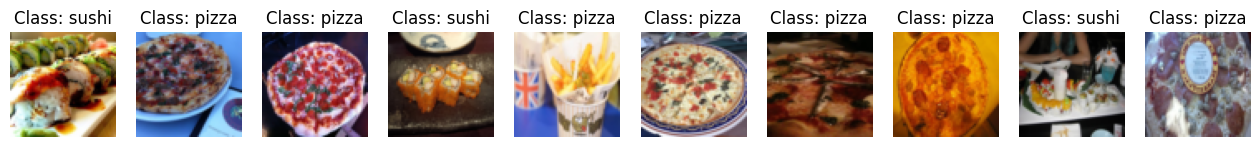

In [49]:
# Display random images from the ImageFolderCustom Dataset
display_random_images(train_data_custom,
                      n=20,
                      classes=class_names,
                      seed=42)

In [50]:
random.sample(range(len(train_data_custom)), k=10)

[173, 189, 139, 22, 151, 108, 8, 7, 23, 55]

### **5.4 Turn custom loaded images into `DataLoader`'s**

In [51]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7e239b3a7d90>,
 <torch.utils.data.dataloader.DataLoader at 0x7e239b18dd20>)

In [52]:
# Get image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Print out the shapes
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## **6. Other forms of transforms (data augmentation)**

Data augmentation is the process of ARTIFICIALLY adding diversity to your training data.

In the case of image data, this may mean applying various image transformations to the training images.

This practice hopefully results in a model that's more generalizable to unseen data.

Let's take a look at one particular type of data augmentation used to train PyTorch vision models to state of the art levels...

Blog post - https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/

In [53]:
# Let's look at trivial augment
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
    ])

test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
    ])

In [54]:
image_path

PosixPath('data/pizza_steak_sushi')

In [55]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/pizza/68684.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2190018.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2992084.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1649276.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2285942.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3860002.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/702165.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1033251.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2382016.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/667309.jpg')]

In [56]:
# Plot random transformed images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3,
    seed=None
)

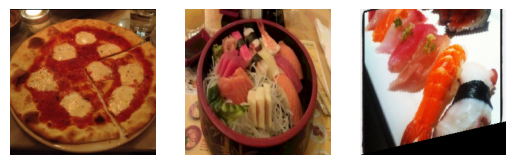

In [57]:
# Import necessary libraries
from torch.utils.data import DataLoader
from torchvision import transforms
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Set parameters
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Assuming train_data_custom and test_data_custom are your datasets
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)

# Define transformations
train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

# Get all image paths
# Assuming image_path is defined
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Define function to plot transformed images
def plot_transformed_images(image_paths, transform, n=3):
    # Select n random images from the image_paths
    selected_images = np.random.choice(image_paths, n)

    for i, image_path in enumerate(selected_images):
        # Open image
        image = Image.open(image_path)

        # Apply transformation
        transformed_image = transform(image)

        # Convert tensor to numpy array for plotting
        transformed_image = transformed_image.numpy().transpose((1, 2, 0))

        # Plot the image
        plt.subplot(1, n, i+1)
        plt.imshow(transformed_image)
        plt.axis('off')

    plt.show()

# Plot random transformed images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3
)


## **7. Model 0: TinyVGG without data augmentation**

### **7.1 Creating transforms and loading data for Model 0**

In [58]:
# Create simple TRANSFORMS
simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [59]:
# 1. Load and transform DATA
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

# 2. Turn the datasets into DataLoaders
import os
from torch.utils.data import DataLoader

# 3. Setup batch size and numbers of
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# 4. Create DataLoader's
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

### **7.2 Create TinyVGG model class**

In [60]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer: https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # Deafult stride value is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # Default stride value is same as kernel_size
    )
    self.classifier = nn.Sequential(
        nn.Flatten(), # Turn output into a FEATURE VECTOR (numerical representation of an object/instance that is used as input for various algorithms)
        # Feature Vector: A one-dimensional array or list of numerical values that represents the characteristics of an instance in a dataset.
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))
# 56 Benefits from operator fusion (this speeds up how your GPU performs computations behind the scenes. All of the things is gonna happen at one step)
# A blog post about OPERATOR FUSION: https://horace.io/brrr_intro.html

In [61]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # Number of color_channels in our image data
                  hidden_units=10,
                  output_shape=len(class_names)).to(device) # We are moving our data from CPU (default) to GPU memory
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### **7.3 Try a FORWARD PASS on a single image to test the model**

In [62]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

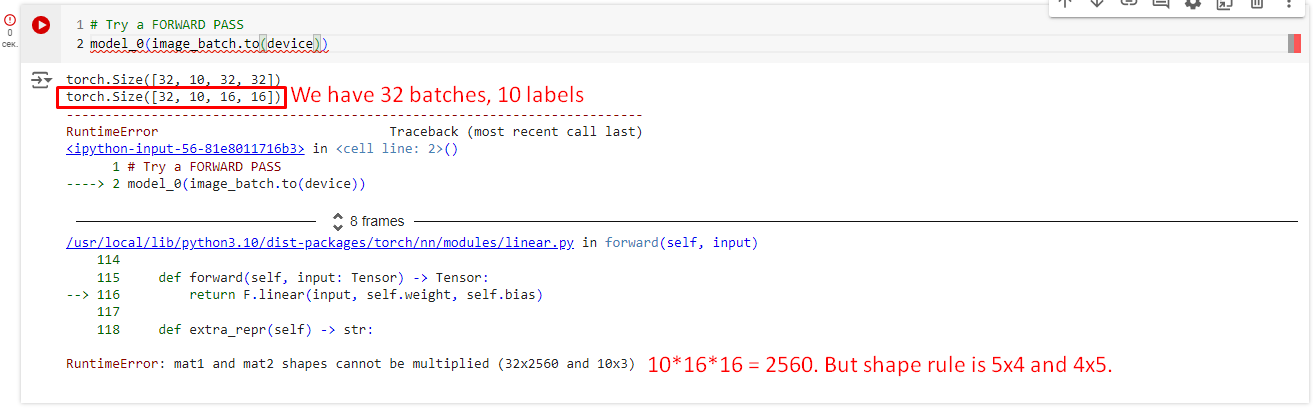

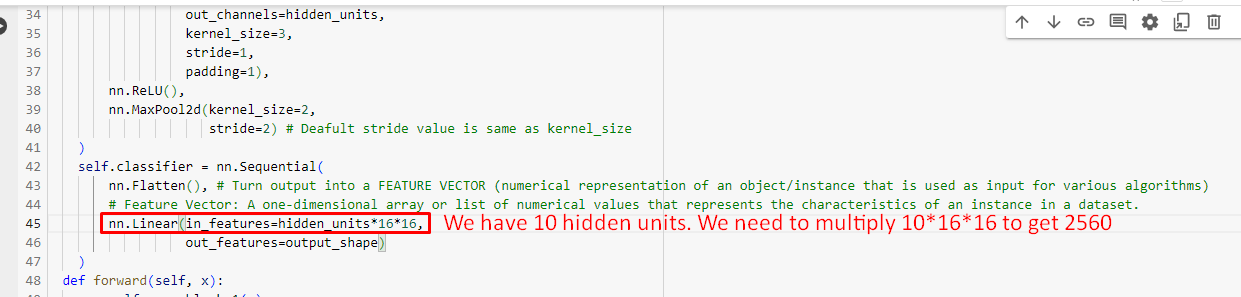

In [63]:
# Try a FORWARD PASS
model_0(image_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4669e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9129e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6417e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7980e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1815e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3994e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.2317e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

### **7.4 Use `torchinfo` to get an idea of the shapes going through our model**

In [64]:
# Install torchinfo, import if it's available
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

### **7.5 Create train and test loops functions**

* `train_step()` - takes in a MODEL, DATALOADER and TRAINS the MODEL on the dataloader
* `test_step()` - takes in a MODEL, DATALOADER and EVALUATES the MODEL on the dataloader

In [65]:
# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to the target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X) # Output model logits

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

Yes, the code snippet you provided is used in the context of machine learning (ML) and deep learning (DL) with PyTorch to convert prediction probabilities to prediction labels. Here’s a detailed explanation:

### Code Explanation

```python
y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
```

#### Breaking it down:

1. **`torch.softmax(y_pred, dim=1)`**:
   - **Purpose**: Converts the raw prediction scores (`y_pred`) to probabilities. The softmax function is commonly used in classification problems, especially in multi-class classification.
   - **Explanation**:
     - `y_pred` is typically the output from a neural network's final layer, which contains raw scores (logits) for each class.
     - `torch.softmax(y_pred, dim=1)` applies the softmax function along the specified dimension (in this case, `dim=1`, which usually corresponds to the class dimension). The softmax function normalizes these scores into probabilities, where each value lies between 0 and 1, and the sum of all probabilities for a given instance equals 1.

2. **`torch.argmax(..., dim=1)`**:
   - **Purpose**: Converts the probabilities to predicted class labels.
   - **Explanation**:
     - `torch.argmax` returns the indices of the maximum values along the specified dimension (`dim=1`).
     - By applying `torch.argmax` to the output of the softmax function, you get the index of the class with the highest probability for each instance.

### Example

Let's consider a simple example to illustrate this:

1. **Raw Predictions (`y_pred`)**:
   - Suppose you have a batch of 3 instances, and your model predicts scores for 4 classes. The `y_pred` might look like this:
     ```python
     y_pred = torch.tensor([
         [1.0, 2.0, 0.5, 0.1],
         [2.0, 1.0, 0.1, 0.5],
         [0.5, 0.2, 1.0, 3.0]
     ])
     ```

2. **Applying Softmax**:
   - Applying softmax to these raw scores will convert them into probabilities:
     ```python
     y_pred_prob = torch.softmax(y_pred, dim=1)
     print(y_pred_prob)
     ```
     The output probabilities might look like this (values are hypothetical):
     ```python
     tensor([
         [0.2041, 0.5568, 0.1512, 0.0879],
         [0.5568, 0.2041, 0.0879, 0.1512],
         [0.0879, 0.0659, 0.1512, 0.6950]
     ])
     ```

3. **Applying Argmax**:
   - Applying `torch.argmax` to these probabilities will give you the predicted class labels:
     ```python
     y_pred_class = torch.argmax(y_pred_prob, dim=1)
     print(y_pred_class)
     ```
     The predicted class labels would be:
     ```python
     tensor([1, 0, 3])
     ```

### Conclusion

The code snippet effectively converts the model's raw output scores into predicted class labels by:
1. Applying the softmax function to convert the scores into probabilities.
2. Using the argmax function to determine the class with the highest probability for each instance.

This is a common practice in classification tasks to interpret the model's output and make predictions.

In [66]:
# Create a test_step()
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module, # We DON'T need an OPTIMIZER FUNCTION IN TEST_STEP
              device=device):
  # Put model in EVAL MODE
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on INFERENCE MODE
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward Pass
      test_pred_logits = model(X) # This is gonna get the raw outputs of our model

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y) # test_pred_logits vs y
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)

  return test_loss, test_acc

## **7.6 Creating a `train()` function to combine `train_step()` and `test_step()`**

In [67]:
from tqdm.auto import tqdm # Progress Bar

# 1. Create a TRAIN FUNCTION that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):

  # 2. Create empty RESULTS DICTIONARY
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    # 4. Print out what's happening
    print(f"Epochs: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update RESULTS DICTIONARY
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Return the filled results at the end of the epochs
  return results

### **7.7 Train and Evaluate `model_0` of our Custom Dataset**

In [68]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate  an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # Number of color_channels of our TARGET IMAGES
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss_fn() and optimizer() FUNCTIONS
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epochs: 0 | Train loss: 1.1063 | Train acc: 0.3047 | Test loss: 1.0983 | Test acc: 0.3011
Epochs: 1 | Train loss: 1.0998 | Train acc: 0.3281 | Test loss: 1.0697 | Test acc: 0.5417
Epochs: 2 | Train loss: 1.0869 | Train acc: 0.4883 | Test loss: 1.0807 | Test acc: 0.4924
Epochs: 3 | Train loss: 1.0843 | Train acc: 0.4023 | Test loss: 1.0608 | Test acc: 0.5833
Epochs: 4 | Train loss: 1.0663 | Train acc: 0.4141 | Test loss: 1.0655 | Test acc: 0.5644
Total training time: 6.972 seconds


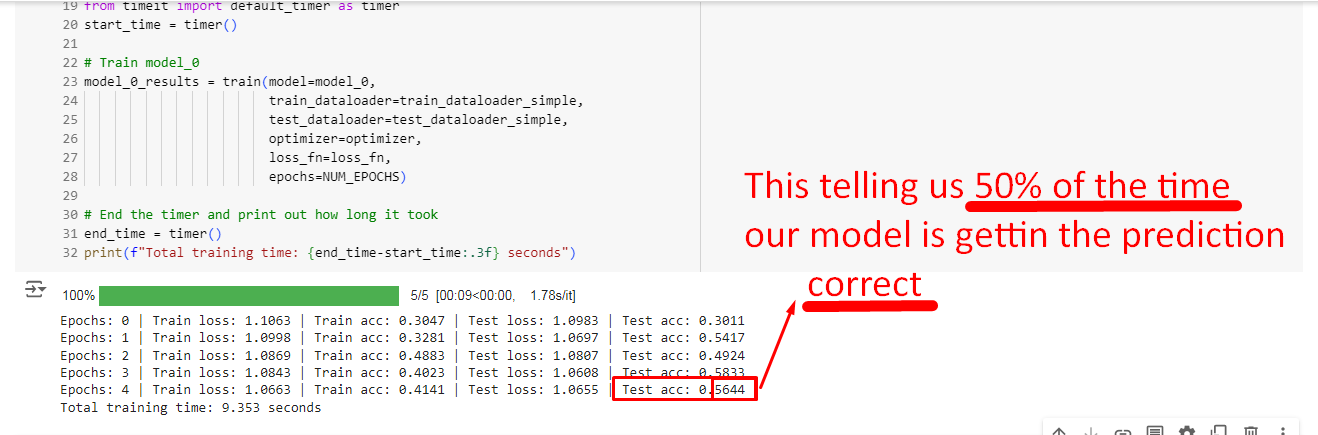

In [69]:
model_0_results

{'train_loss': [1.1063191443681717,
  1.0998065173625946,
  1.0868552029132843,
  1.0843388885259628,
  1.0662541836500168],
 'train_acc': [0.3046875, 0.328125, 0.48828125, 0.40234375, 0.4140625],
 'test_loss': [1.0983210404713948,
  1.0696895122528076,
  1.0807261069615681,
  1.060804049173991,
  1.0655029614766438],
 'test_acc': [0.30113636363636365,
  0.5416666666666666,
  0.49242424242424243,
  0.5833333333333334,
  0.5643939393939394]}

### **7.8 Plot the LOSS CURVES of Model 0**

A **loss curve** is a way of tracking your model's progress over time.

In [70]:
# Get the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

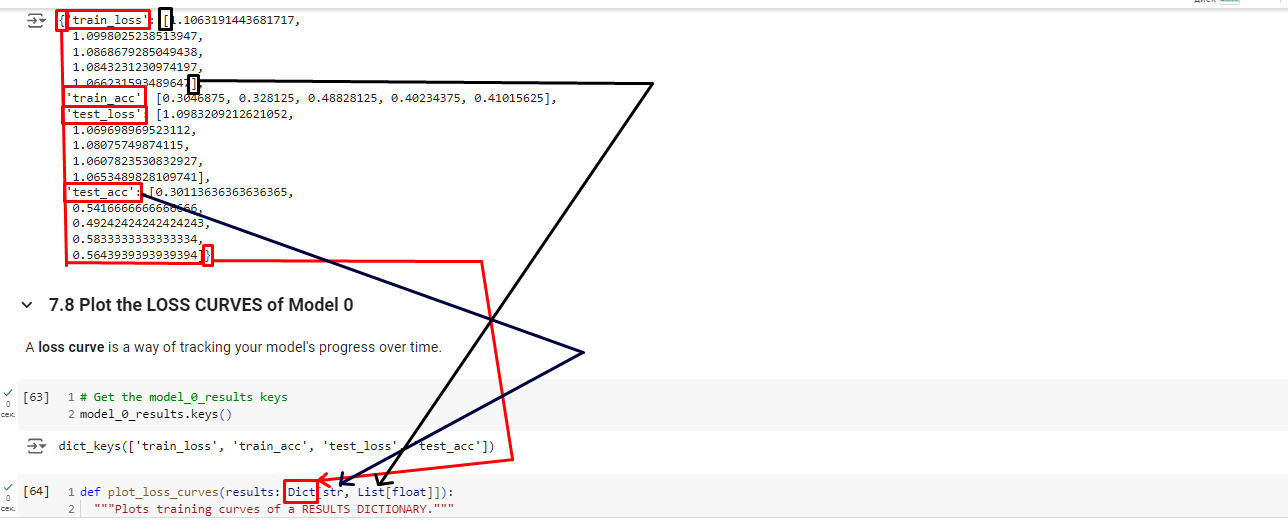

In [71]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """Plots training curves of a RESULTS DICTIONARY."""
  # Get the loss values of the results dictionary(training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary (training and test)
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # Figure out how many epochs there were
  epochs = range(len(results["train_loss"]))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  # Plot the loss
  plt.subplot(1, 2, 1) # 1 - row, 2 - columns, 1 - index
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

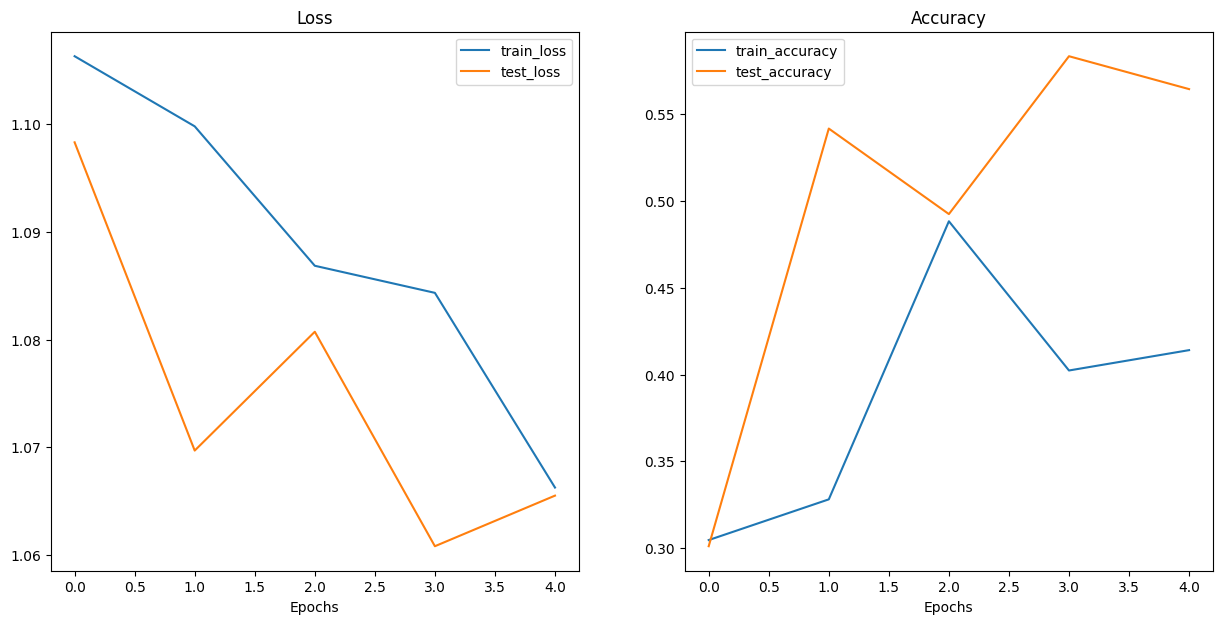

In [72]:
plot_loss_curves(model_0_results)

## **8. What should an ideal LOSS CURVE look like?**

https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic

A **LOSS CURVE** is one of the most helpful ways to troubleshoot a model.

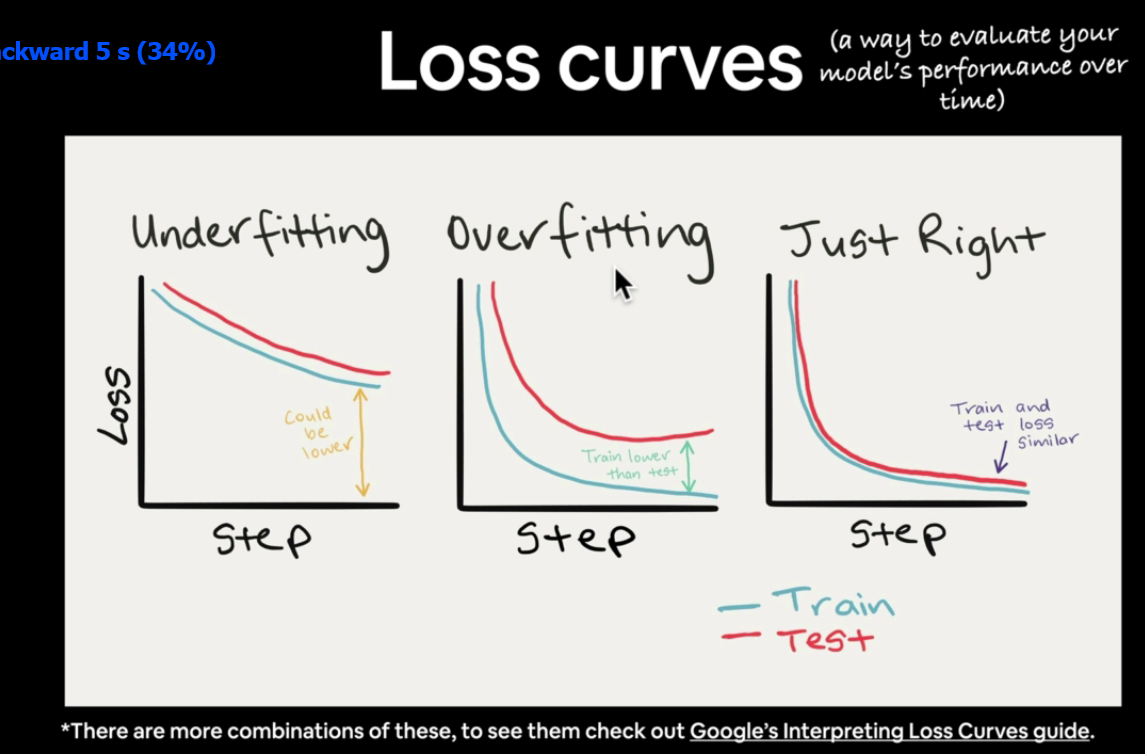

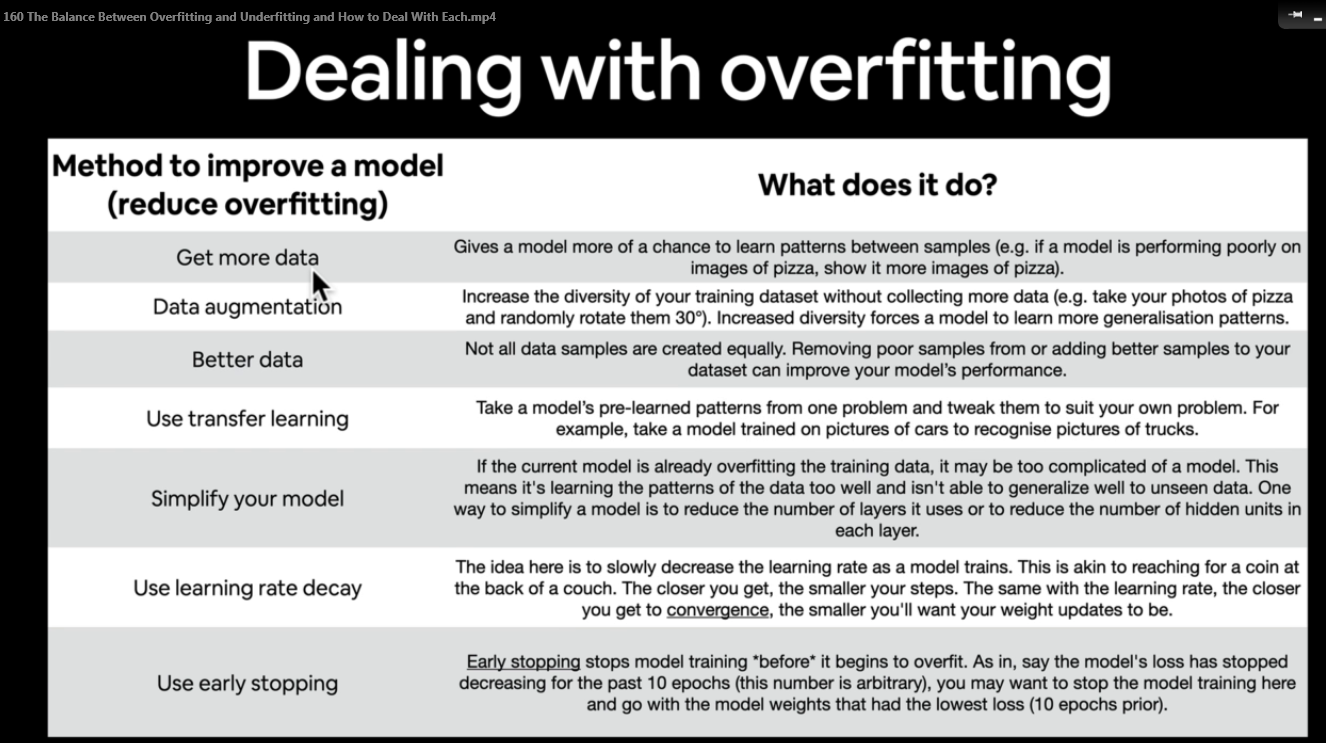

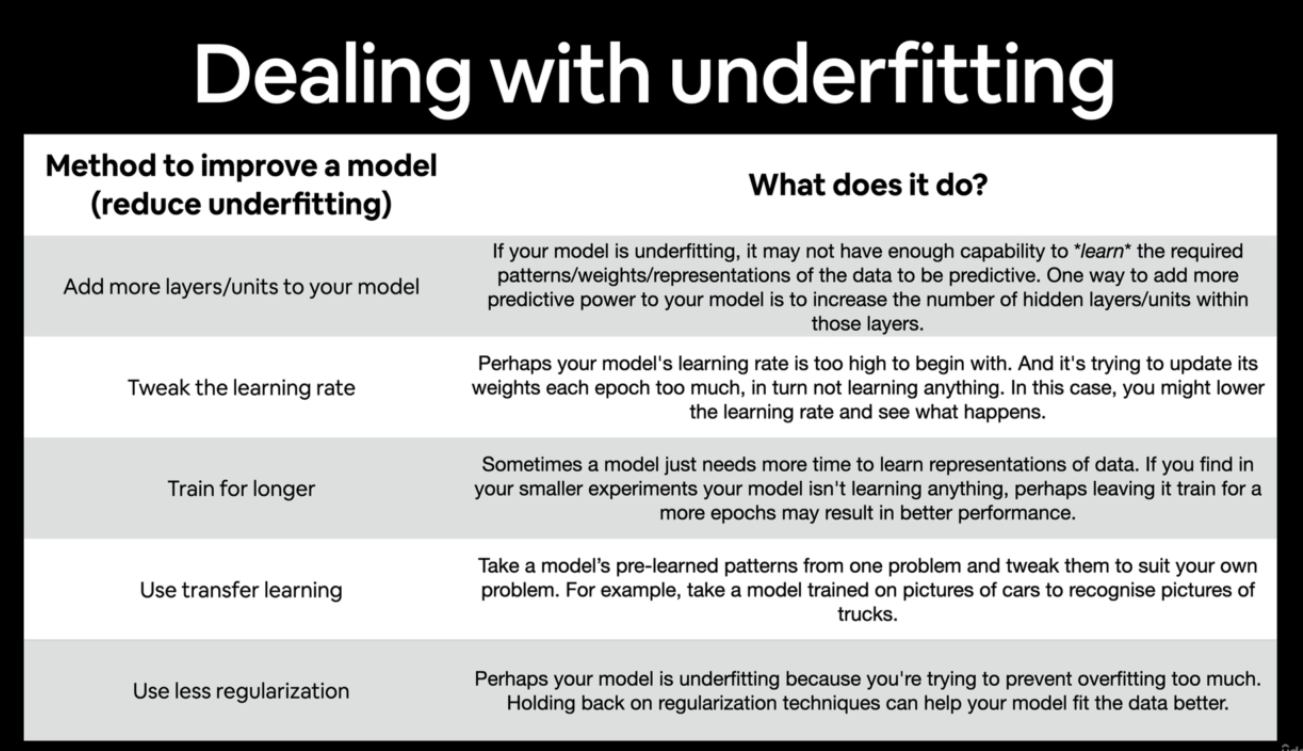

## **9. Model 1: TinyVGG with Data Augmentation**

Now let's try another modelling experiment this time using the same model as before but with some DATA AUGMENTATION

### **9.1 Create transform with DATA AUGMENTATION**

In [73]:
# Create training transform with TrivialAugmentWide
from torchvision import transforms
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)), # TRANSFORMS help us manipulate the data
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor() # In TESTING TRANSFORM we don't need TrivialAugmentWide. Because we only want to EVAULATE our MODEL on TEST_DATASET
    # Our model is not gonna learn any generalizable PATTERNS on test dataset.
])

### **9.2 Create TRAIN and TEST `Dataset`'s and `DataLoader`'s with DATA AUGMENTATION**

In [74]:
# Turn Image Folders into Datasets
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_simple)

In [75]:
# Turn our Datasets into DataLoaders
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

### **9.3 Construct and train model 1**

This time we'll be using the same model architecture except this time we've augmented the training data.

In [76]:
# Create model_1 and send it to the TARGET DEVICE
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

Now we've got a model and dataloaders. Let's create a loss function and optimizer and call upon our `train()` function to train and evaluate our model.

In [77]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
NUM_EPOCHS = 5

# Set up LOSS FUNCTION
loss_fn = nn.CrossEntropyLoss() # loss_fn = criterion in PyTorch. nn.CrossEntropyLoss() function for a multi-class classification
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train Model 1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time for Model 1: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epochs: 0 | Train loss: 1.1049 | Train acc: 0.2500 | Test loss: 1.1019 | Test acc: 0.2604
Epochs: 1 | Train loss: 1.0807 | Train acc: 0.4258 | Test loss: 1.1260 | Test acc: 0.2604
Epochs: 2 | Train loss: 1.0713 | Train acc: 0.4258 | Test loss: 1.1593 | Test acc: 0.2604
Epochs: 3 | Train loss: 1.1258 | Train acc: 0.3047 | Test loss: 1.1583 | Test acc: 0.2604
Epochs: 4 | Train loss: 1.0861 | Train acc: 0.4219 | Test loss: 1.1551 | Test acc: 0.3125
Total training time for Model 1: 5.863 seconds


### **9.4 Plot the LOSS CURVES of MODEL 1**

A **LOSS CURVE** helps you evaluate your models performance overtime.

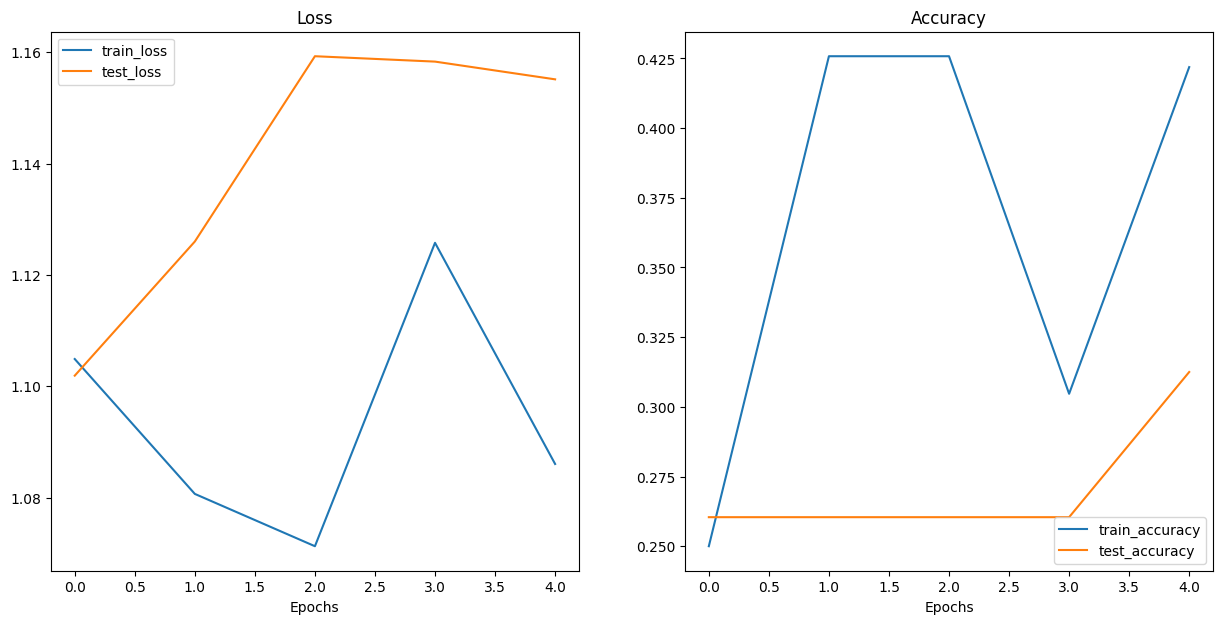

In [78]:
plot_loss_curves(model_1_results)

## **10. Compare model results**

After evaluating our modelling experiments on their own, it's important to compare them to each other.

There's a few different ways to do this:

1. Hard coding (what we're doing)
2. PyTorch + Tensorboard - https://pytorch.org/tutorials/recipes/recipes/tensorboard_with_pytorch.html
3. Weights and Biases - https://wandb.ai/site/experiment-tracking
4. MLFlow - https://mlflow.org/

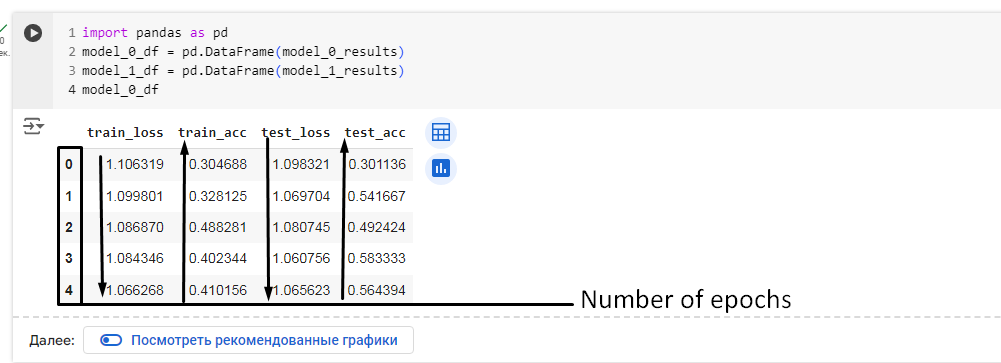

In [79]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

train_loss  train_acc  test_loss  test_acc
0    1.106319   0.304688   1.098321  0.301136
1    1.099807   0.328125   1.069690  0.541667
2    1.086855   0.488281   1.080726  0.492424
3    1.084339   0.402344   1.060804  0.583333
4    1.066254   0.414062   1.065503  0.564394

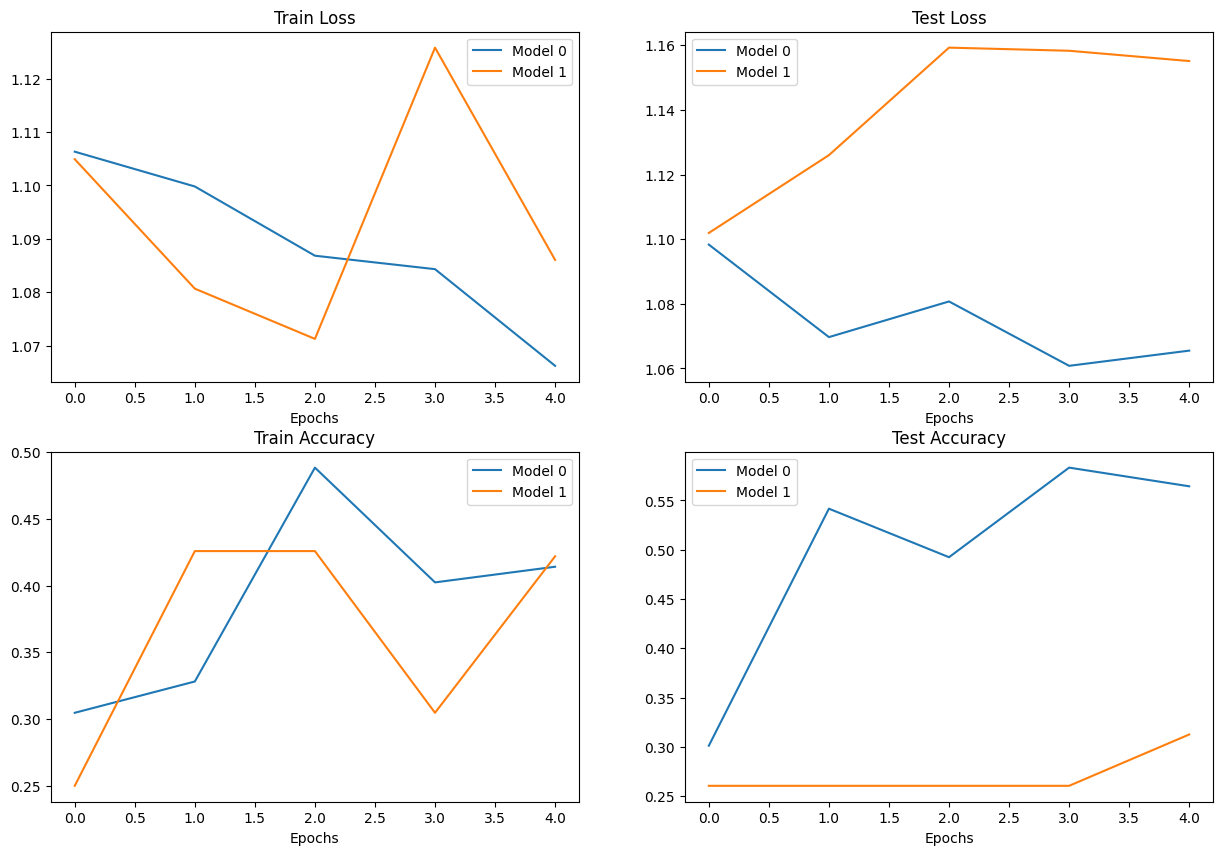

In [80]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot TRAIN LOSS
plt.subplot(2, 2, 1) # 2 - rows, 2 - columns, 1 - index (will be the TRAINING LOSS)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot TEST LOSS
plt.subplot(2, 2, 2) # 2 - rows, 2 - columns, 2 - index (will be the TESTING LOSS)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot TRAIN ACCURACY
plt.subplot(2, 2, 3) # 2 - rows, 2 - columns, 3 - index (will be the TRAINING ACCURACY)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot TEST ACCURACY
plt.subplot(2, 2, 4) # 2 - rows, 2 - columns, 4 - index (will be the TESTING ACCURACY)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

## **11. Making a prediction on a CUSTOM IMAGE**

Although we've trained a model on custom data... how do you make a prediction on a sample/image that's not in either training or testing.

In [81]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    # When downloading from GitHub, need to use the "raw" file link
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/04-pizza-dad.jpeg")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists, skipping download...")

### **11.1 Loading in a CUSTOM IMAGE with PyTorch**

* In TENSOR FORM with DATATYPE (torch.float32)
* Of shape 64x64x3
* On the right DEVICE

We can read an image into PyTorch using - https://pytorch.org/vision/stable/generated/torchvision.io.read_image.html

In [82]:
import torchvision # The PACKAGE you use to load the data will depend on the DOMAIN you are in

# Read in CUSTOM IMAGE
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path)) # io = INPUT and OUTPUT
print(f"Custom image tensor:\n {custom_image_uint8}")
print(f"Custom image shape: {custom_image_uint8.shape}")
print(f"Custom image datatype: {custom_image_uint8}")

Custom image tensor:
 tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
Custom image shape: torch.Size([3, 4032, 3024])
Custom image data

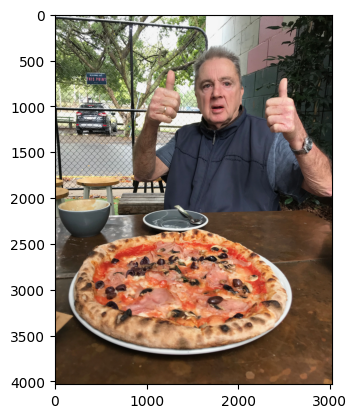

In [83]:
plt.imshow(custom_image_uint8.permute(1, 2, 0));

### **11.2 Making a prediction on a custom image with a trained PyTorch model**

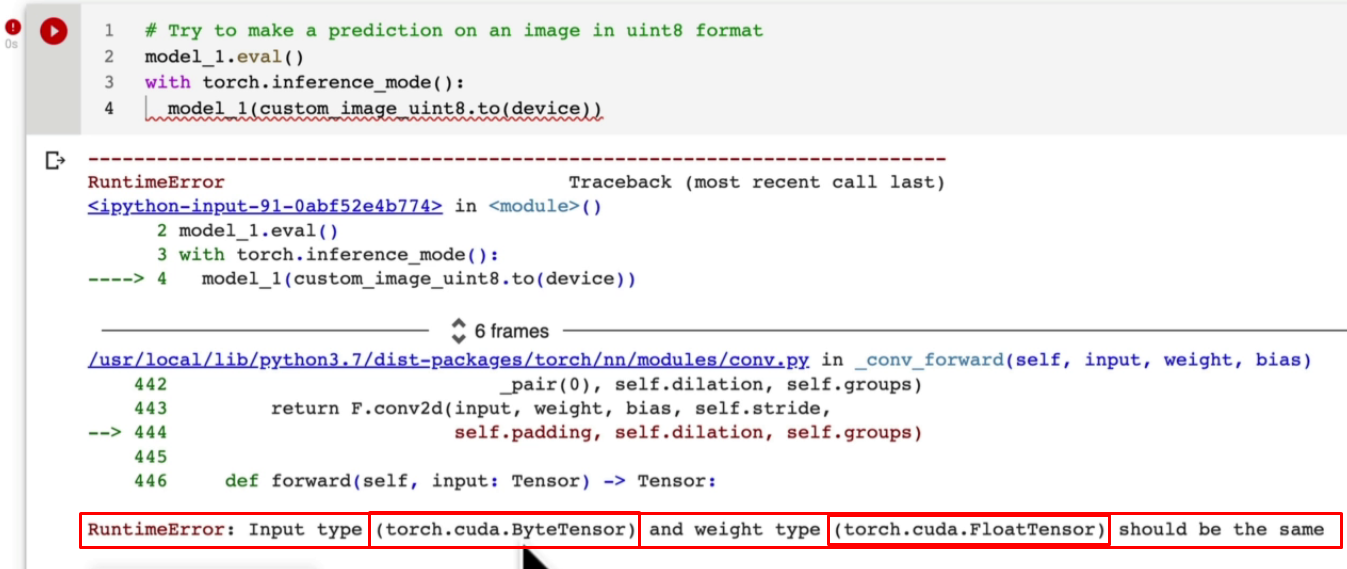

**/ 255.** Why do we devide by 255? Because it's a standard format is to **STORE THE IMAGE TENSOR VALUES** in values **from 0 to 255 for RED / GREEN / BLUE color_channels**

If you want to scale these values to be between **0 and 1,** we can DIVIDE the by **255.** Because that is the maximum value that can be.

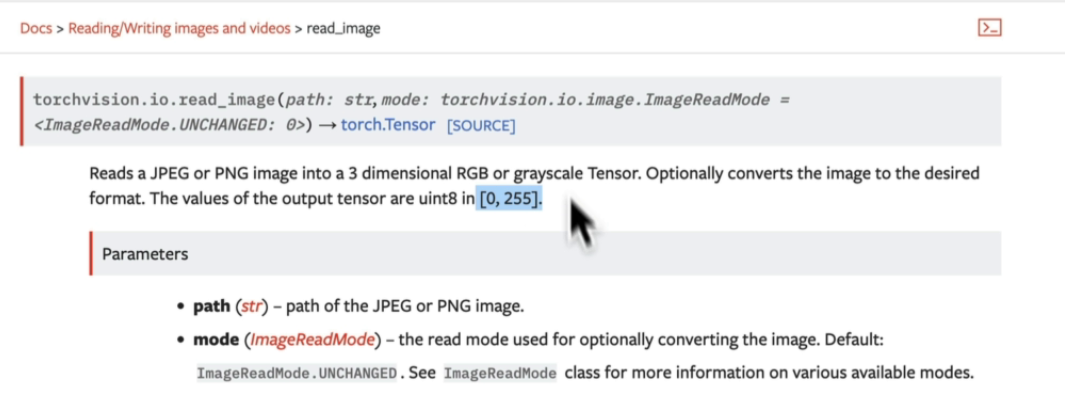

In [84]:
# Load in the custom image and convert to torch.float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255.
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

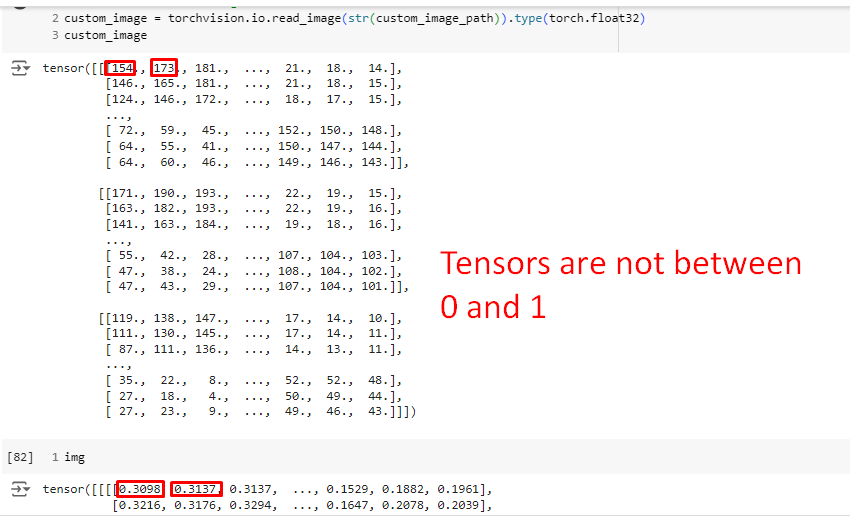

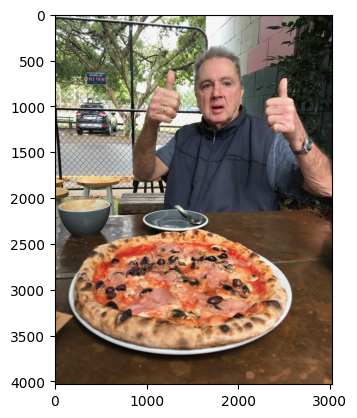

In [85]:
plt.imshow(custom_image.permute(1, 2, 0))

In [86]:
img

tensor([[[[0.0941, 0.0941, 0.0941,  ..., 0.1020, 0.1059, 0.1059],
          [0.1020, 0.1020, 0.1020,  ..., 0.2549, 0.2667, 0.2745],
          [0.1059, 0.1098, 0.1098,  ..., 0.5529, 0.5412, 0.5333],
          ...,
          [0.3020, 0.3216, 0.3373,  ..., 0.6078, 0.6039, 0.6000],
          [0.1059, 0.1098, 0.1176,  ..., 0.6078, 0.6078, 0.6039],
          [0.1020, 0.1020, 0.1020,  ..., 0.5569, 0.5647, 0.5529]],

         [[0.0745, 0.0745, 0.0745,  ..., 0.0667, 0.0706, 0.0745],
          [0.0824, 0.0824, 0.0824,  ..., 0.2471, 0.2588, 0.2627],
          [0.0902, 0.0941, 0.0902,  ..., 0.5765, 0.5686, 0.5608],
          ...,
          [0.2902, 0.3059, 0.3255,  ..., 0.6000, 0.6039, 0.6039],
          [0.0824, 0.0824, 0.0824,  ..., 0.6078, 0.6078, 0.6039],
          [0.0627, 0.0588, 0.0627,  ..., 0.5451, 0.5686, 0.5608]],

         [[0.0510, 0.0510, 0.0510,  ..., 0.0510, 0.0431, 0.0392],
          [0.0588, 0.0588, 0.0588,  ..., 0.1765, 0.1843, 0.1882],
          [0.0549, 0.0588, 0.0627,  ..., 0

In [87]:
# Create TRANSFORM pipeline to resize image
from torchvision import transforms

custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64, 64))
])

# TRANSFORM TARGET IMAGE
custom_image_transformed = custom_image_transform(custom_image)

# Print out the shapes
print(f"Original shape: {custom_image.shape}")
print(f"Transformed shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
Transformed shape: torch.Size([3, 64, 64])


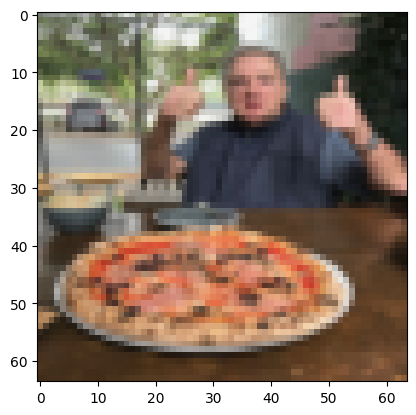

In [88]:
plt.imshow(custom_image_transformed.permute(1, 2, 0))

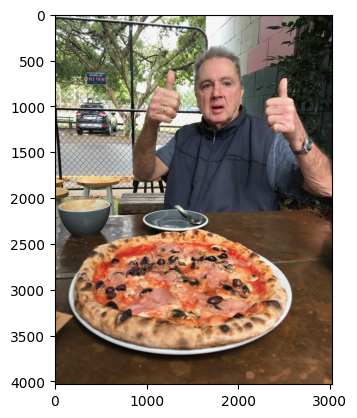

In [89]:
plt.imshow(custom_image.permute(1, 2, 0))

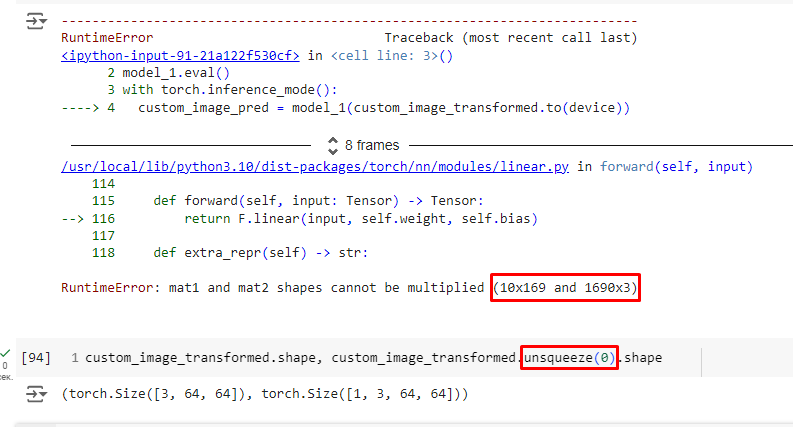

In PyTorch, the `unsqueeze` method adds a singleton dimension (i.e., a dimension with size 1) at the specified position. The numbering of dimensions starts from 0, which corresponds to the first dimension. Whether `unsqueeze(0)` results in a row or a column depends on the context and how you interpret the dimensions of the tensor.

### Understanding Dimensions:

- **Batch Dimension**: When working with image data, a common convention is to add a batch dimension. If your image tensor has the shape `(3, 64, 64)` (representing channels, height, width), `unsqueeze(0)` will add a new dimension at the beginning, resulting in a shape of `(1, 3, 64, 64)`. This new dimension typically represents the batch size, meaning you now have a batch of 1 image.

### Example Explanation:

In the image you provided, the initial shape of the tensor is `(3, 64, 64)`:
- `3` represents the number of channels (e.g., RGB).
- `64` represents the height and width of the image.

After applying `custom_image_transformed.unsqueeze(0)`, the shape changes to `(1, 3, 64, 64)`. Here’s the breakdown:
- `1` is the new dimension added, usually representing the batch size.
- `3` remains the number of channels.
- `64` and `64` remain the height and width, respectively.

### Row vs. Column Interpretation:

- **Row**: If you think of the batch dimension as a row in a higher-dimensional matrix where each row is an image, then `unsqueeze(0)` makes each image a row.
- **Column**: If you visualize tensors differently, you might interpret it as a column, but typically in deep learning, the batch dimension is not viewed in terms of rows or columns.

In summary, `unsqueeze(0)` typically adds a new dimension at the front, often used to create a batch dimension for processing a single image in a model. This doesn't directly relate to the concept of a row or column as in 2D matrices, but more to the idea of adding a new hierarchical level to your tensor structure.

In [90]:
custom_image_transformed.shape, custom_image_transformed.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [91]:
# Try to make a prediction on an image in uint8 FORMAT
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))

custom_image_pred

tensor([[ 0.0807,  0.0350, -0.2066]], device='cuda:0')

**We got LOGIT VALUES FOR EACH of our CUSTOM CLASSES: 0.0811 - this could be pizza, 0.0346 - this could be steak, -0.2068 - sushi**

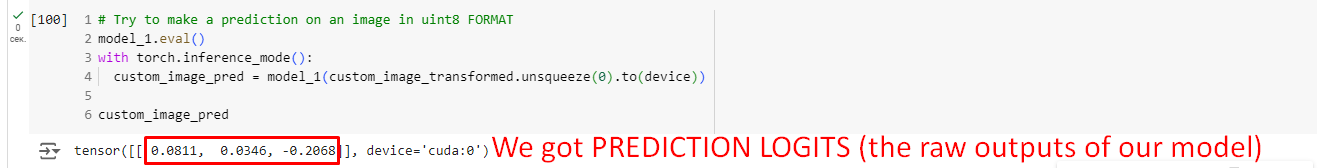

# NOTE: to make a prediction on a custom image we had to:
* Load the image and turn it into a **TENSOR**
* Make sure the image was the **same datatype** as the **model (torch.float32)**
* Make sure the image was the **same shape** as **the data the model was trained on (3, 64, 64) with a batch_size ... (1, 3, 64, 64)**
* Make sure the image was on the **same device** as our **model.**

In [92]:
# Convert LOGITS -> PREDICTION PROBABILITIES. We use torch.softmax() because we are working with MULTI-CLASS CLASSIFICATION DATA
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1) # dim = 1 means this: [ 0.0811,  0.0346, -0.2068] the RAW OUTPUTS of our model
custom_image_pred_probs

tensor([[0.3696, 0.3531, 0.2773]], device='cuda:0')

In [93]:
# Convert PREDICTION PROBABILITIES -> PREDICTION LABELS. We use torch.argmax because we are working with MULTI-CLASS CLASSIFICATION DATA
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1).cpu() # You might run into some errors. You have to change to cpu() later on
custom_image_pred_label

tensor([0])

In [95]:
class_names[custom_image_pred_label]

'pizza'

### **11.3 Putting custom image prediction together: BUILDING a FUNCTION**

### **IDEAL OUTCOME**

### A FUNCTION where we pass an image path to and have our MODEL PREDICT on that image and plot the IMAGE + PREDICTION

In [96]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device=device):
  """Makes a prediction on a TARGET IMAGE with a TRAINED MODEL and plots the image and prediction."""
  # Load in the image
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  # Divide the image pixel values by 225 to get them between [0, 1] in range
  target_image = target_image / 225.

  # Transform if necessary
  if transform:
    target_image = transform(target_image)

  # Make sure the model is on the TARGET DEVICE
  model.to(device)

  # Turn on EVAL/INFERENCE_MODE to make a prediction
  model.eval()
  with torch.inference_mode():
    # Add an extra dimension to the image (this is the BATCH DIMENSION, e.g: our model will PREDICT ON BATCHES of 1x IMAGE)
    target_image = target_image.unsqueeze(0)

    # Make a prediction on the image with an extra dimension
    target_image_pred = model(target_image.to(device)) # Make sure the TARGET IMAGE is on the right DEVICE

  # Convert LOGITS -> PREDICTION PROBABILITIES
  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

  # Convert PREDICTION PROBABILITIES -> PREDICTION LABELS
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

  # Plot the image alongside the PREDICTION and PREDICTION PROBABILITY
  plt.imshow(target_image.squeeze().permute(1, 2, 0)) # remove BATCH DIMENSION and REARRANGE shape to be H W C
  if class_names:
    title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    # We need to put on cpu(), because MATPLOTLIB can not handle on the GPU()
  else:
    title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  plt.title(title)
  plt.axis(False)

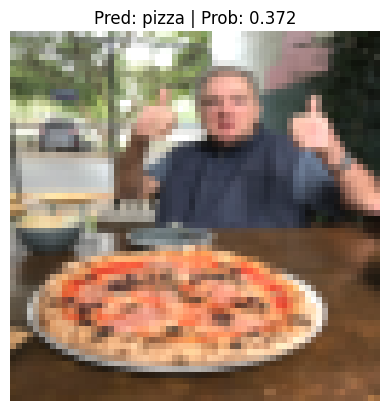

In [97]:
# Pred on our CUSTOM IMAGE
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)